In [99]:
#Data set
import pandas as pd

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']

semestre = [8, 8, 10, 1, 2, 7, 5, 6, 3, 3]
edad = [19, 25, 30, 18, 20, 30, 22, 25, 29, 27]
promedio = [4.5, 4.4, 4.1, 4.2, 3.5, 2.6, 4.4, 2.6, 3.6, 1.0]

print(pd.DataFrame({"Semestre": semestre, "Edad" : edad, "Promedio": promedio}))


   Semestre  Edad  Promedio
0         8    19       4.5
1         8    25       4.4
2        10    30       4.1
3         1    18       4.2
4         2    20       3.5
5         7    30       2.6
6         5    22       4.4
7         6    25       2.6
8         3    29       3.6
9         3    27       1.0


In [100]:
#Normalizar

x = []
y = []
z = []

def _normalize(array):
    result = []
    xmin  = min(array)
    xmax = max(array)
    
    for i in array:
        x = (i - xmin)/(xmax - xmin)
        result.append(x)
    return result

x = _normalize(semestre)
y = _normalize(edad)
z = _normalize(promedio)

print(pd.DataFrame({"x": x, "y" : y, "z": z}))

          x         y         z
0  0.777778  0.083333  1.000000
1  0.777778  0.583333  0.971429
2  1.000000  1.000000  0.885714
3  0.000000  0.000000  0.914286
4  0.111111  0.166667  0.714286
5  0.666667  1.000000  0.457143
6  0.444444  0.333333  0.971429
7  0.555556  0.583333  0.457143
8  0.222222  0.916667  0.742857
9  0.222222  0.750000  0.000000


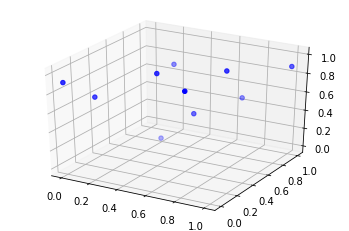

In [101]:
#Graficar

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

asignar=[]

for row in x:
    asignar.append(colores[0])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()

In [102]:
#Centroides inicales 
import random 


k1 = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
k2 = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]

print(k1)
print(k2)

[0.49286658601076416, 0.1838481946374162, 0.2762723853276454]
[0.6513300116939535, 0.7655541129325221, 0.740987892497108]


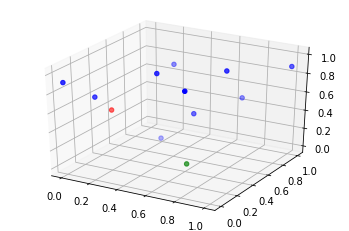

In [96]:
#Grafica centroides

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

xc = []
yc = []
zc = []

xc = x
yc = y
zc = z

xc.append(k1[0])
yc.append(k1[1])
zc.append(k1[2])

xc.append(k2[0])
yc.append(k2[1])
zc.append(k2[2])

asignar=["blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","red","green"]
color_c = [0,0,0,0,0,0,0,0,0,0,1,1]

ax2.scatter(xc, yc, zc, c=asignar, marker='o')

plt.show()

In [103]:
#Distancia euclidiana
import math
def _dEuclidiana(punto, centroide):
    result = 0  
    result = math.sqrt(math.pow((centroide[0]-punto[0]),2)+math.pow((centroide[1]-punto[1]),2)+math.pow((centroide[2]-punto[2]),2))
    return result

#print(_dEuclidiana([0.22, 0.75, 0.0],[0.3, 0.8, 0.4]))

In [108]:

dk1 = []
dk2 = []
cluster = []
for i in range(10):
    punto = [x[i], y[i],  z[i]]
    dk1.append(_dEuclidiana(punto, k1))
    dk2.append(_dEuclidiana(punto, k2))
    if dk1[i] < dk2[i]:
        cluster.append(1)
    else:
        cluster.append(2)
    
        
print(pd.DataFrame({"x": x, "y" : y, "z": z, "dk1": dk1, "dk2": dk2, "cluster": cluster}))

          x         y         z       dk1       dk2  cluster
0  0.777778  0.083333  1.000000  0.784257  0.740609        2
1  0.777778  0.583333  0.971429  0.850885  0.319838        2
2  1.000000  1.000000  0.885714  1.137852  0.444389        2
3  0.000000  0.000000  0.914286  0.826909  1.019969        1
4  0.111111  0.166667  0.714286  0.581281  0.806979        1
5  0.666667  1.000000  0.457143  0.853829  0.368467        2
6  0.444444  0.333333  0.971429  0.712694  0.531714        2
7  0.555556  0.583333  0.457143  0.442981  0.350635        2
8  0.222222  0.916667  0.742857  0.909930  0.454942        2
9  0.222222  0.750000  0.000000  0.685640  0.856410        1


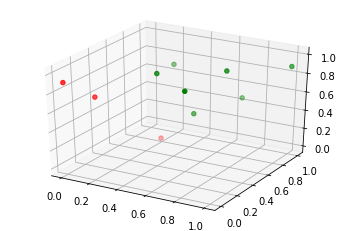

In [109]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

asignar=[]

for row in cluster:
    asignar.append(colores[row])

ax1.scatter(x, y, z, c=asignar, marker='o')

plt.show()